In [1]:
#import modules

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
np.random.seed(42)

# Get the data

In [2]:
#locate file directory

current = os.getcwd()
path = os.path.join(current, 'VAERSData')
file_names = os.listdir(path) 


In [3]:

data_index = len(file_names)-1

data = pd.read_csv(os.path.join(path, file_names[data_index]), encoding= "UTF-8")

data.head()


 

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,RECOVD,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,START_DATE
0,1038288,NY,67.0,F,N,Y,Y,Y,Y,Y,N,0
1,1038289,MA,59.0,M,N,Y,N,N,N,N,N,0
2,1038290,IL,68.0,M,Y,N,Y,Y,Y,N,Y,0
3,1038291,FL,82.0,F,N,N,Y,N,Y,N,N,30
4,1038292,MA,74.0,F,N,U,Y,N,Y,N,Y,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450822 entries, 0 to 450821
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   VAERS_ID    450822 non-null  int64  
 1   STATE       450822 non-null  object 
 2   AGE_YRS     450822 non-null  float64
 3   SEX         450822 non-null  object 
 4   DIED        450822 non-null  object 
 5   RECOVD      450822 non-null  object 
 6   OTHER_MEDS  450822 non-null  object 
 7   CUR_ILL     450822 non-null  object 
 8   HISTORY     450822 non-null  object 
 9   PRIOR_VAX   450822 non-null  object 
 10  ALLERGIES   450822 non-null  object 
 11  START_DATE  450822 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 41.3+ MB


In [114]:
np.sort(data["STATE"].unique())

# make the following set of changes ["AS : AZ", " Ca : CA", "DC : WA", "FM: FL","MH : MA", "MP : MS", "None :DELETE","PR:DELETE","QM:DELETE","VI:VA","XB:DELETE","XL:DELETE","XV:DELETE"  ]


array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'Ca', 'DC', 'DE',
       'FL', 'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'None', 'OH', 'OK',
       'OR', 'PA', 'PR', 'QM', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VI', 'VT', 'WA', 'WI', 'WV', 'WY', 'XB', 'XL', 'XV'], dtype=object)

In [26]:
data.describe()

,VAERS_ID,AGE_YRS,START_DATE
count,4.508220e+05,450822.000000,450822.000000
mean,1.272297e+06,48.547712,21.380265
std,2.304917e+05,18.488988,49.780987
min,9.166000e+05,0.000000,0.000000
25%,1.078538e+06,34.000000,0.000000
50%,1.240232e+06,48.500000,0.000000
75%,1.459020e+06,63.000000,21.000000
max,1.730988e+06,119.000000,356.000000


---

# Split the data(statified by age)

In [43]:
print(max(data["AGE_YRS"])-min(data["AGE_YRS"]))

119.0


In [4]:
target_maps = np.arange(0,120,12)


In [5]:
data_catagory = []

for x in data["AGE_YRS"]:
    minimum = 1000
    best_map = 0
    for y in target_maps:
        difference = abs(x-y)
        if difference < minimum:
            minimum = difference
            best_map = y
    data_catagory.append(best_map)

In [6]:
data["data_catagory"] = data_catagory

In [7]:
data.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,RECOVD,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,START_DATE,data_catagory
0,1038288,NY,67.0,F,N,Y,Y,Y,Y,Y,N,0,72
1,1038289,MA,59.0,M,N,Y,N,N,N,N,N,0,60
2,1038290,IL,68.0,M,Y,N,Y,Y,Y,N,Y,0,72
3,1038291,FL,82.0,F,N,N,Y,N,Y,N,N,30,84
4,1038292,MA,74.0,F,N,U,Y,N,Y,N,Y,0,72


<AxesSubplot:>

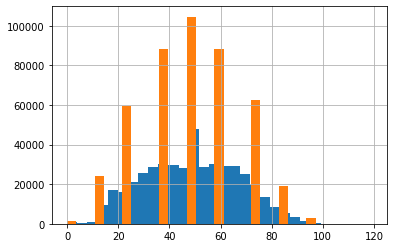

In [86]:
data['AGE_YRS'].hist(bins = 30)
data["data_catagory"].hist(bins = 30)

In [8]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [9]:
for train_index, test_index in split.split(data, data["data_catagory"]):
    strat_train_set = data.reindex(index = train_index )
    strat_test_set = data.reindex(index = test_index )
    
    
strat_train_set.info()
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360657 entries, 137201 to 264124
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   VAERS_ID       360657 non-null  int64  
 1   STATE          360657 non-null  object 
 2   AGE_YRS        360657 non-null  float64
 3   SEX            360657 non-null  object 
 4   DIED           360657 non-null  object 
 5   RECOVD         360657 non-null  object 
 6   OTHER_MEDS     360657 non-null  object 
 7   CUR_ILL        360657 non-null  object 
 8   HISTORY        360657 non-null  object 
 9   PRIOR_VAX      360657 non-null  object 
 10  ALLERGIES      360657 non-null  object 
 11  START_DATE     360657 non-null  int64  
 12  data_catagory  360657 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 38.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90165 entries, 61106 to 185971
Data columns (total 13 columns):
 #   Column         Non-Null Cou

In [91]:
data["data_catagory"].value_counts() / len(data)

48     0.231843
36     0.196210
60     0.195944
72     0.138716
24     0.131799
12     0.053580
84     0.042833
96     0.006371
0      0.002631
108    0.000073
Name: data_catagory, dtype: float64

In [10]:
for set in (strat_train_set, strat_test_set):        #remove the data_catagory attribute so the data is back to its original state      
    set.drop(["data_catagory"], axis=1, inplace=True)

In [94]:
strat_train_set.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,RECOVD,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,START_DATE
137201,1609860,IL,53.0,F,N,U,N,N,N,N,N,0
184339,1267698,MO,19.0,F,N,Y,Y,N,N,N,N,1
393926,1598365,FL,75.0,F,N,Y,Y,N,N,N,N,0
206765,1174256,CA,42.0,F,N,Y,Y,Y,Y,N,N,30
365061,1343632,UT,34.0,F,N,Y,Y,N,Y,N,Y,3


---

# Discover and Visualize the Data to Gain Insights

In [187]:
explore = strat_train_set.copy() 

In [188]:
explore.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,RECOVD,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,START_DATE
137201,1609860,IL,53.0,F,N,U,N,N,N,N,N,0
184339,1267698,MO,19.0,F,N,Y,Y,N,N,N,N,1
393926,1598365,FL,75.0,F,N,Y,Y,N,N,N,N,0
206765,1174256,CA,42.0,F,N,Y,Y,Y,Y,N,N,30
365061,1343632,UT,34.0,F,N,Y,Y,N,Y,N,Y,3


In [189]:
correlation = explore.corr()

print(correlation)

            VAERS_ID   AGE_YRS  START_DATE
VAERS_ID    1.000000 -0.046401    0.092014
AGE_YRS    -0.046401  1.000000    0.120857
START_DATE  0.092014  0.120857    1.000000


In [190]:
explore["RECOVD"].value_counts()

Y       134637
N       125173
U        66181
None     34666
Name: RECOVD, dtype: int64

In [191]:
explore["STATE"].value_counts()

CA      37185
None    33237
FL      20998
TX      20736
NY      19536
        ...  
MH          2
XV          1
QM          1
Ca          1
XL          1
Name: STATE, Length: 64, dtype: int64

In [194]:
explore["PRIOR_VAX"].value_counts()

N    341032
Y     19625
Name: PRIOR_VAX, dtype: int64

In [193]:
explore["SEX"].value_counts()

F    252392
M    103171
U      5094
Name: SEX, dtype: int64

In [195]:
explore["DIED"].value_counts()

N    356633
Y      4024
Name: DIED, dtype: int64

In [196]:
explore["OTHER_MEDS"].value_counts()

Y    184210
N    176446
n         1
Name: OTHER_MEDS, dtype: int64

In [197]:
explore["CUR_ILL"].value_counts()

N    314406
Y     46249
n         2
Name: CUR_ILL, dtype: int64

In [198]:
explore["HISTORY"].value_counts()

N    201362
Y    159294
n         1
Name: HISTORY, dtype: int64

---

# Data cleaning pipeline

---

### fix misspelled attributes and drop None values

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin



class Edit_attributes(BaseEstimator, TransformerMixin):
    def __init__(self): 
        self.e = None

    def fit(self, sett, y=None):
        return self # nothing else to do

    def transform(self, sett, y=None):

        sett["STATE"].where(sett["STATE"] != "AS", "AZ", inplace=True)
        sett["STATE"].where(sett["STATE"] != "Ca", "CA", inplace=True)
        sett["STATE"].where(sett["STATE"] != "DC", "WA", inplace=True)
        sett["STATE"].where(sett["STATE"] != "FM", "FL", inplace=True)
        sett["STATE"].where(sett["STATE"] != "MH", "MA", inplace=True)
        sett["STATE"].where(sett["STATE"] != "MP", "MS", inplace=True)
        sett["STATE"].where(sett["STATE"] != "VI", "VA", inplace=True)
        sett["STATE"].where(sett["STATE"] != "GU", None, inplace=True)
        sett["STATE"].where(sett["STATE"] != "PR", None, inplace=True)
        sett["STATE"].where(sett["STATE"] != "QM", None, inplace=True)
        sett["STATE"].where(sett["STATE"] != "XB", None, inplace=True)
        sett["STATE"].where(sett["STATE"] != "XL", None, inplace=True)
        sett["STATE"].where(sett["STATE"] != "XV", None, inplace=True)
        sett["STATE"].where(sett["STATE"] != "None", None, inplace=True)

        sett["SEX"].where(sett["SEX"] != "U", None, inplace=True)

        sett["RECOVD"].where(sett["RECOVD"] != "U", None, inplace=True)
        sett["RECOVD"].where(sett["RECOVD"] != "None", None, inplace=True)

        sett["OTHER_MEDS"].where(sett["OTHER_MEDS"] != "n", "N", inplace=True)

        sett["CUR_ILL"].where(sett["CUR_ILL"] != "n", "N", inplace=True)

        sett["HISTORY"].where(sett["HISTORY"] != "n", "N", inplace=True)

        sett["ALLERGIES"].where(sett["ALLERGIES"] != "n", "N", inplace=True)

        sett = sett.dropna()

        return sett


---

### convert text values into numeric and onehot encode

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



class Custom_Encoder(BaseEstimator, TransformerMixin):
    def __init__(self): 
        self.encoder = None

    def fit(self, my_data, y=None):
        return self # nothing else to do

    def transform(self, my_data, y=None):

        encoder1 = LabelEncoder()
        my_data.iloc[:,1] = (encoder1.fit_transform(my_data.iloc[:,1])).reshape(-1,1)
        encoder3 = LabelEncoder()
        my_data.iloc[:,3] = (encoder3.fit_transform(my_data.iloc[:,3])).reshape(-1,1)
        encoder4 = LabelEncoder()
        my_data.iloc[:,4] = (encoder4.fit_transform(my_data.iloc[:,4])).reshape(-1,1)
        encoder5 = LabelEncoder()
        my_data.iloc[:,5] = (encoder5.fit_transform(my_data.iloc[:,5])).reshape(-1,1)
        encoder6 = LabelEncoder()
        my_data.iloc[:,6] = (encoder6.fit_transform(my_data.iloc[:,6])).reshape(-1,1)
        encoder7 = LabelEncoder()
        my_data.iloc[:,7] = (encoder7.fit_transform(my_data.iloc[:,7])).reshape(-1,1)
        encoder8 = LabelEncoder()
        my_data.iloc[:,8] = (encoder8.fit_transform(my_data.iloc[:,8])).reshape(-1,1)
        encoder9 = LabelEncoder()
        my_data.iloc[:,9] = (encoder9.fit_transform(my_data.iloc[:,9])).reshape(-1,1)
        encoder10 = LabelEncoder()
        my_data.iloc[:,10] = (encoder10.fit_transform(my_data.iloc[:,10])).reshape(-1,1)
        
        catagories = my_data.drop(["VAERS_ID", "AGE_YRS", "START_DATE"], axis=1)
        
        
        onehotencoder = OneHotEncoder()
        encoded = onehotencoder.fit_transform(catagories).toarray()

        return encoded


### select the specified list of columns

In [13]:


# transforms the data by selecting the desired 
# attributes (numerical or categorical) , dropping 
# the rest, and converting the resulting 
# DataFrame to a NumPy array 


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

## Final pipeline

In [14]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



label_pipeline = Pipeline([
        ("editor",Edit_attributes()),
        ("selector", DataFrameSelector(["START_DATE"]))         
    ])


num_pipeline = Pipeline([
        ("editor", Edit_attributes()),
        ("selector", DataFrameSelector(["AGE_YRS"])),   # select attributes numerical or catagorical
        ("std_scaler", StandardScaler())              # scale features(standardization)
    ])

cat_pipeline = Pipeline([
        ("editor",Edit_attributes()),
        ("encoder", Custom_Encoder())         
    ])


full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

## Transform

In [15]:
my_labels = label_pipeline.fit_transform(strat_train_set)

In [16]:
my_labels.shape

(241173, 1)

In [17]:
pd.options.mode.chained_assignment = None  # default='warn'

attributes = full_pipeline.fit_transform(strat_train_set)


In [18]:
attributes.shape

(241173, 67)

---

# Select and Train a Model


In [19]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(attributes, my_labels)

LinearRegression()

In [20]:
some_data = attributes[0:5]
some_labels = my_labels[0:5]
print("Predictions:\t", lin_reg.predict(some_data))


Predictions:	 [[ 9.6015625]
 [22.5390625]
 [10.3984375]
 [13.25     ]
 [25.90625  ]]


In [21]:
some_labels

array([[ 1],
       [ 0],
       [30],
       [ 3],
       [ 4]], dtype=int64)

In [22]:
from sklearn.metrics import mean_squared_error


predictions = lin_reg.predict(attributes)
lin_mse = mean_squared_error(my_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

48.4841199297184

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [31]:
linear_reg = LinearRegression()


linear_scores = cross_val_score(linear_reg, attributes, my_labels,
                            scoring="neg_mean_squared_error", cv=5)
linear_rmse_scores = np.sqrt(-forest_scores)
display_scores(linear_rmse_scores)

Scores: [53.59353176 53.94501175 53.91184126 54.00214602 54.0062685 ]
Mean: 53.891759857637545
Standard deviation: 0.15328167351421526


---

In [23]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(attributes, my_labels)

DecisionTreeRegressor()

In [24]:
tree_predictions = tree_reg.predict(attributes)
tree_mse = mean_squared_error(my_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

37.12585719019061

---

In [27]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(tree_reg, attributes, my_labels,
                        scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [28]:
 
display_scores(rmse_scores)

Scores: [59.53963375 59.18524882 59.00969894 59.84477178 59.22384085 59.9486998
 59.94415634 58.74719272 58.9516453  60.34322787]
Mean: 59.473811618831384
Standard deviation: 0.5006354655931988


In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg, attributes, my_labels,
                            scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


C:\Users\abreham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abreham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abreham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abreham\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vec

Scores: [53.59353176 53.94501175 53.91184126 54.00214602 54.0062685 ]
Mean: 53.891759857637545
Standard deviation: 0.15328167351421526


In [35]:
import joblib
joblib.dump(forest_reg, "forest_model_for_onset_date_prediction.pkl")
joblib.dump(tree_reg, "tree_model_for_onset_date_prediction.pkl")
joblib.dump(linear_reg, "linear_model_for_onset_date_prediction.pkl")

['linear_model_for_onset_date_prediction.pkl']

---